### Fuzzy Logic: Performa Akademis Siswa Berdasarkan Kebiasaan Mereka

### Metode Mamdani

### 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#### 2. Membership Function

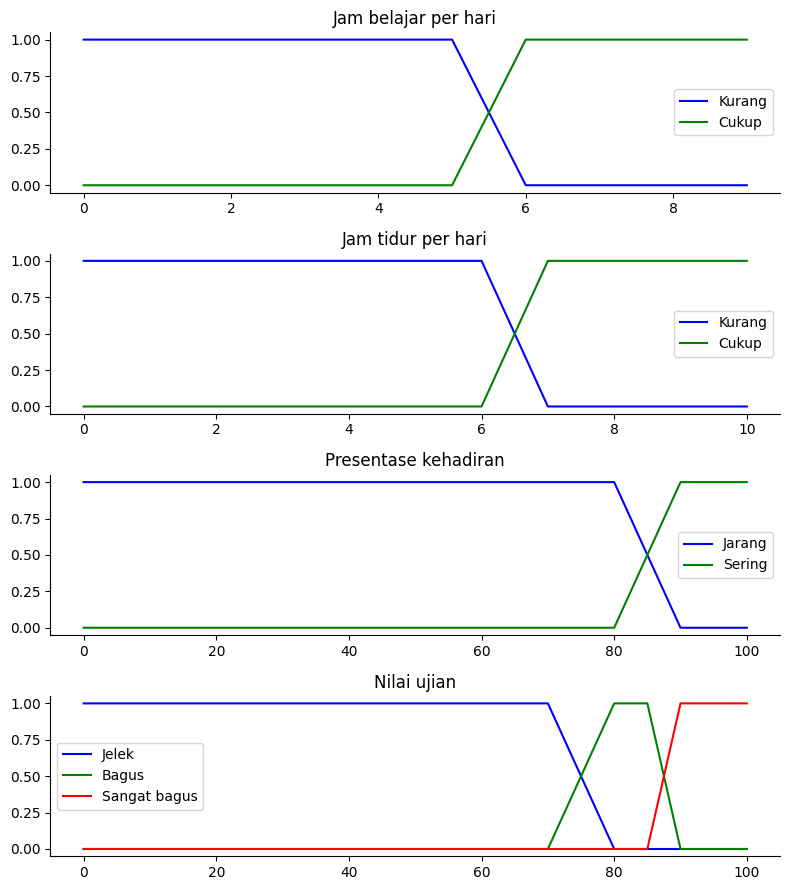

In [2]:
# semesta input
x_jam_belajar_per_hari = np.arange(0, 9.1, 0.1, dtype=float)
x_jam_tidur_per_hari = np.arange(0, 10.1, 0.1, dtype=float)
x_presentase_kehadiran = np.arange(0, 100.1, 0.1, dtype=float)

# semesta output
x_nilai_ujian = np.arange(0, 100.1, 0.1, dtype=float)

# membership function
jam_belajar_kurang = fuzz.trapmf(x_jam_belajar_per_hari, [0, 0, 5, 6])
jam_belajar_cukup = fuzz.trapmf(x_jam_belajar_per_hari, [5, 6, 9, 9])

jam_tidur_kurang = fuzz.trapmf(x_jam_tidur_per_hari, [0, 0, 6, 7])
jam_tidur_cukup = fuzz.trapmf(x_jam_tidur_per_hari, [6, 7, 10, 10])

kehadiran_jarang = fuzz.trapmf(x_presentase_kehadiran, [0, 0, 80, 90])
kehadiran_sering = fuzz.trapmf(x_presentase_kehadiran, [80, 90, 100, 100])

nilai_ujian_jelek = fuzz.trapmf(x_nilai_ujian, [0, 0, 70, 80])
nilai_ujian_bagus = fuzz.trapmf(x_nilai_ujian, [70, 80, 85, 90])
nilai_ujian_sangat_bagus = fuzz.trapmf(x_nilai_ujian, [85, 90, 100, 100])

# visualize membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))

ax0.plot(x_jam_belajar_per_hari, jam_belajar_kurang, 'b', linewidth=1.5, label='Kurang')
ax0.plot(x_jam_belajar_per_hari, jam_belajar_cukup, 'g', linewidth=1.5, label='Cukup')
ax0.set_title('Jam belajar per hari')
ax0.legend()

ax1.plot(x_jam_tidur_per_hari, jam_tidur_kurang, 'b', linewidth=1.5, label='Kurang')
ax1.plot(x_jam_tidur_per_hari, jam_tidur_cukup, 'g', linewidth=1.5, label='Cukup')
ax1.set_title('Jam tidur per hari')
ax1.legend()

ax2.plot(x_presentase_kehadiran, kehadiran_jarang, 'b', linewidth=1.5, label='Jarang')
ax2.plot(x_presentase_kehadiran, kehadiran_sering, 'g', linewidth=1.5, label='Sering')
ax2.set_title('Presentase kehadiran')
ax2.legend()

ax3.plot(x_nilai_ujian, nilai_ujian_jelek, 'b', linewidth=1.5, label='Jelek')
ax3.plot(x_nilai_ujian, nilai_ujian_bagus, 'g', linewidth=1.5, label='Bagus')
ax3.plot(x_nilai_ujian, nilai_ujian_sangat_bagus, 'r', linewidth=1.5, label='Sangat bagus')
ax3.set_title('Nilai ujian')
ax3.legend()

for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

#### 3. Extract data from CSV file

In [3]:
data_siswa = pd.read_csv("student_habits_performance.csv")

#### 4. Implementasi fuzzification, fuzzy rules, dan defuzzification pada tiap data

In [4]:
# untuk visualisasi tabel
data_fz_jb_kurang = []
data_fz_jb_cukup = []
data_fz_jt_kurang = []
data_fz_jt_cukup = []
data_fz_kehadiran_jarang = []
data_fz_kehadiran_sering = []
data_prediksi_nilai_ujian = []

for _, row in data_siswa.iterrows():
    # crisp input
    input_jam_belajar = row["study_hours_per_day"]
    input_jam_tidur = row["sleep_hours"]
    input_presentase_kehadiran = row["attendance_percentage"]

    # implement fuzzification with crisp input
    fz_jam_belajar_kurang = fuzz.interp_membership(x_jam_belajar_per_hari, jam_belajar_kurang, input_jam_belajar)
    fz_jam_belajar_cukup = fuzz.interp_membership(x_jam_belajar_per_hari, jam_belajar_cukup, input_jam_belajar)

    fz_jam_tidur_kurang = fuzz.interp_membership(x_jam_tidur_per_hari, jam_tidur_kurang, input_jam_tidur)
    fz_jam_tidur_cukup = fuzz.interp_membership(x_jam_tidur_per_hari, jam_tidur_cukup, input_jam_tidur)

    fz_kehadiran_jarang = fuzz.interp_membership(x_presentase_kehadiran, kehadiran_jarang, input_presentase_kehadiran)
    fz_kehadiran_sering = fuzz.interp_membership(x_presentase_kehadiran, kehadiran_sering, input_presentase_kehadiran)

    # untuk visualisasi tabel
    data_fz_jb_kurang.append(fz_jam_belajar_kurang)
    data_fz_jb_cukup.append(fz_jam_belajar_cukup)
    data_fz_jt_kurang.append(fz_jam_tidur_kurang)
    data_fz_jt_cukup.append(fz_jam_tidur_cukup)
    data_fz_kehadiran_jarang.append(fz_kehadiran_jarang)
    data_fz_kehadiran_sering.append(fz_kehadiran_sering)

    # implement fuzzy rules
    rule_jelek1 = np.minimum.reduce([fz_jam_belajar_kurang, fz_jam_tidur_kurang, fz_kehadiran_jarang])
    rule_jelek2 = np.minimum.reduce([fz_jam_belajar_kurang, fz_jam_tidur_kurang, fz_kehadiran_sering])
    rule_jelek3 = np.minimum.reduce([fz_jam_belajar_kurang, fz_jam_tidur_cukup, fz_kehadiran_jarang])
    rule_jelek4 = np.minimum.reduce([fz_jam_belajar_cukup, fz_jam_tidur_kurang, fz_kehadiran_jarang])

    # pilih nilai maksimum dari rules yang memberikan output 'jelek' (Operasi OR)
    max_rule_jelek = np.maximum.reduce([rule_jelek1, rule_jelek2, rule_jelek3, rule_jelek4])
    nilai_ujian_activation_jelek = np.fmin(max_rule_jelek, nilai_ujian_jelek)

    rule_bagus1 = np.minimum.reduce([fz_jam_belajar_kurang, fz_jam_tidur_cukup, fz_kehadiran_sering])
    rule_bagus2 = np.minimum.reduce([fz_jam_belajar_cukup, fz_jam_tidur_kurang, fz_kehadiran_sering])
    rule_bagus3 = np.minimum.reduce([fz_jam_belajar_cukup, fz_jam_tidur_cukup, fz_kehadiran_jarang])
    
    # pilih nilai maksimum dari rules yang memberikan output 'bagus' (Operasi OR)
    max_rule_bagus = np.maximum.reduce([rule_bagus1, rule_bagus2, rule_bagus3])
    nilai_ujian_activation_bagus = np.fmin(max_rule_bagus, nilai_ujian_bagus)

    rule_sangat_bagus = np.minimum.reduce([fz_jam_belajar_cukup, fz_jam_tidur_cukup, fz_kehadiran_sering])
    nilai_ujian_acivation_sangat_bagus = np.fmin(rule_sangat_bagus, nilai_ujian_sangat_bagus)
    
    # hasil agregasi bentuk grafik membership function nilai ujian pada 'jelek', 'bagus', 'sangat bagus' dalam bentuk deret y-axis
    aggregated = np.maximum.reduce([nilai_ujian_activation_jelek, nilai_ujian_activation_bagus, nilai_ujian_acivation_sangat_bagus])

    # hasil defuzzification menggunakan centroid
    prediksi_nilai_ujian = fuzz.defuzz(x_nilai_ujian, aggregated, 'centroid')
    data_prediksi_nilai_ujian.append(prediksi_nilai_ujian)

#### 5. Evaluasi

In [5]:
# visualisasi tabel
evaluasi_data = {
    'jam tidur per hari': list(data_siswa['sleep_hours']),
    'fz_jt_kurang': data_fz_jt_kurang,
    'fz_jt_cukup': data_fz_jt_cukup,
    'jam belajar per hari': list(data_siswa['study_hours_per_day']),
    'fz_jb_kurang': data_fz_jb_kurang,
    'fz_jb_cukup': data_fz_jb_cukup,
    'presentase kehadiran': list(data_siswa['attendance_percentage']),
    'fz_kehadiran_jarang': data_fz_kehadiran_jarang,
    'fz_kehadiran_sering': data_fz_kehadiran_sering,
    'nilai ujian aktual': list(data_siswa["exam_score"]),
    'prediksi nilai ujian': data_prediksi_nilai_ujian
}
visual_data = pd.DataFrame(evaluasi_data)

data_nilai_ujian_sebenarnya = list(data_siswa["exam_score"])
mae = 0
n = 0

for nilai_prediksi, nilai_aktual in zip(data_prediksi_nilai_ujian, data_nilai_ujian_sebenarnya):
    mae += abs((nilai_prediksi - nilai_aktual))
    n += 1

mae = mae / n

print("Mean Absolute Error: " + str(mae))
visual_data

Mean Absolute Error: 26.27267281963803


,jam tidur per hari,fz_jt_kurang,fz_jt_cukup,jam belajar per hari,fz_jb_kurang,fz_jb_cukup,presentase kehadiran,fz_kehadiran_jarang,fz_kehadiran_sering,nilai ujian aktual,prediksi nilai ujian
0,8.0,0.0,1.0,0.0,1.0,0.0,85.0,0.50,0.50,56.2,44.377934
1,4.6,1.0,0.0,6.9,0.0,1.0,97.3,0.00,1.00,100.0,81.000000
2,8.0,0.0,1.0,1.4,1.0,0.0,94.8,0.00,1.00,34.3,81.000000
3,9.2,0.0,1.0,1.0,1.0,0.0,71.0,1.00,0.00,26.8,37.555556
4,4.9,1.0,0.0,5.0,1.0,0.0,90.9,0.00,1.00,66.4,37.555556
...,...,...,...,...,...,...,...,...,...,...,...
995,7.5,0.0,1.0,2.6,1.0,0.0,77.0,1.00,0.00,76.1,37.555556
996,6.8,0.2,0.8,2.9,1.0,0.0,86.0,0.40,0.60,65.9,46.912511
997,6.5,0.5,0.5,3.0,1.0,0.0,61.9,1.00,0.00,64.4,38.763441
998,7.6,0.0,1.0,5.4,0.6,0.4,100.0,0.00,1.00,69.7,85.111922


### Metode Sugeno

### 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#### 2. Membership Function

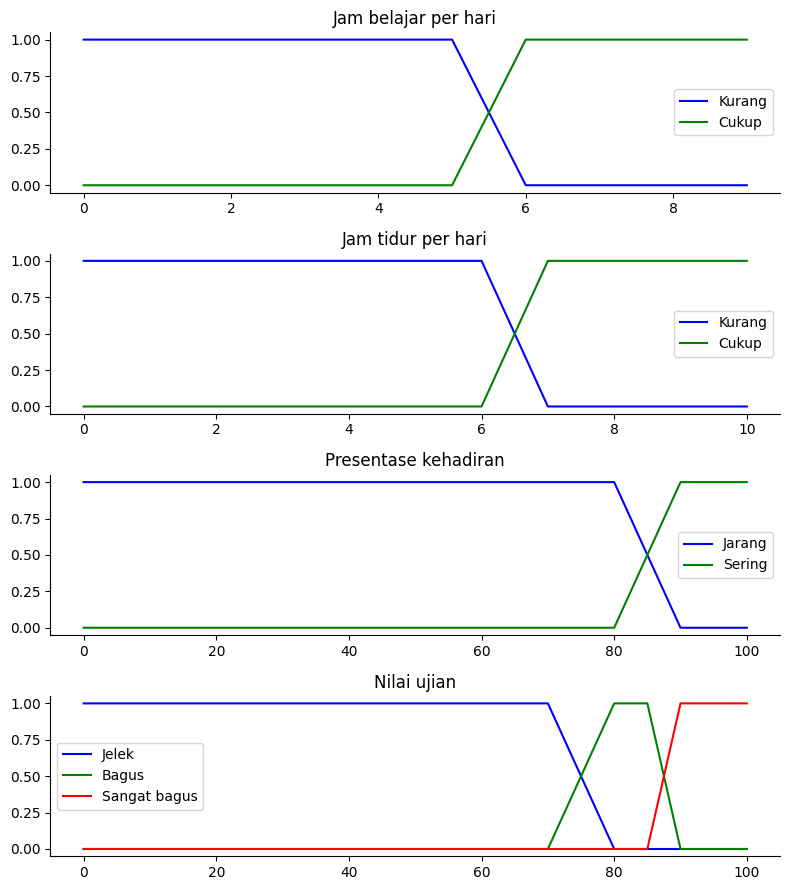

In [2]:
# semesta input
x_jam_belajar_per_hari = np.arange(0, 9.1, 0.1, dtype=float)
x_jam_tidur_per_hari = np.arange(0, 10.1, 0.1, dtype=float)
x_presentase_kehadiran = np.arange(0, 100.1, 0.1, dtype=float)

# semesta output
x_nilai_ujian = np.arange(0, 100.1, 0.1, dtype=float)

# membership function
jam_belajar_kurang = fuzz.trapmf(x_jam_belajar_per_hari, [0, 0, 5, 6])
jam_belajar_cukup = fuzz.trapmf(x_jam_belajar_per_hari, [5, 6, 9, 9])

jam_tidur_kurang = fuzz.trapmf(x_jam_tidur_per_hari, [0, 0, 6, 7])
jam_tidur_cukup = fuzz.trapmf(x_jam_tidur_per_hari, [6, 7, 10, 10])

kehadiran_jarang = fuzz.trapmf(x_presentase_kehadiran, [0, 0, 80, 90])
kehadiran_sering = fuzz.trapmf(x_presentase_kehadiran, [80, 90, 100, 100])

nilai_ujian_jelek = fuzz.trapmf(x_nilai_ujian, [0, 0, 70, 80])
nilai_ujian_bagus = fuzz.trapmf(x_nilai_ujian, [70, 80, 85, 90])
nilai_ujian_sangat_bagus = fuzz.trapmf(x_nilai_ujian, [85, 90, 100, 100])

# visualize membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))

ax0.plot(x_jam_belajar_per_hari, jam_belajar_kurang, 'b', linewidth=1.5, label='Kurang')
ax0.plot(x_jam_belajar_per_hari, jam_belajar_cukup, 'g', linewidth=1.5, label='Cukup')
ax0.set_title('Jam belajar per hari')
ax0.legend()

ax1.plot(x_jam_tidur_per_hari, jam_tidur_kurang, 'b', linewidth=1.5, label='Kurang')
ax1.plot(x_jam_tidur_per_hari, jam_tidur_cukup, 'g', linewidth=1.5, label='Cukup')
ax1.set_title('Jam tidur per hari')
ax1.legend()

ax2.plot(x_presentase_kehadiran, kehadiran_jarang, 'b', linewidth=1.5, label='Jarang')
ax2.plot(x_presentase_kehadiran, kehadiran_sering, 'g', linewidth=1.5, label='Sering')
ax2.set_title('Presentase kehadiran')
ax2.legend()

ax3.plot(x_nilai_ujian, nilai_ujian_jelek, 'b', linewidth=1.5, label='Jelek')
ax3.plot(x_nilai_ujian, nilai_ujian_bagus, 'g', linewidth=1.5, label='Bagus')
ax3.plot(x_nilai_ujian, nilai_ujian_sangat_bagus, 'r', linewidth=1.5, label='Sangat bagus')
ax3.set_title('Nilai ujian')
ax3.legend()

for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

#### 3. Extract data from CSV file

In [3]:
data_siswa = pd.read_csv("student_habits_performance.csv")

#### 4. Implementasi fuzzification, fuzzy rules, dan defuzzification pada tiap data

In [5]:
# untuk visualisasi tabel
data_fz_jb_kurang = []
data_fz_jb_cukup = []
data_fz_jt_kurang = []
data_fz_jt_cukup = []
data_fz_kehadiran_jarang = []
data_fz_kehadiran_sering = []
data_prediksi_nilai_ujian = []

def weighted_average(a:list, z:list):
    if len(a) != len(z):
        print("Nilai predikat atau nilai z idak lengkap")
        return 0
    
    res = 0
    for x, y in zip(a, z):
        res += x * y
    
    res = res / sum(a)
    return res

for _, row in data_siswa.iterrows():
    # crisp input
    input_jam_belajar = row["study_hours_per_day"]
    input_jam_tidur = row["sleep_hours"]
    input_presentase_kehadiran = row["attendance_percentage"]

    # implement fuzzification with crisp input
    fz_jam_belajar_kurang = fuzz.interp_membership(x_jam_belajar_per_hari, jam_belajar_kurang, input_jam_belajar)
    fz_jam_belajar_cukup = fuzz.interp_membership(x_jam_belajar_per_hari, jam_belajar_cukup, input_jam_belajar)

    fz_jam_tidur_kurang = fuzz.interp_membership(x_jam_tidur_per_hari, jam_tidur_kurang, input_jam_tidur)
    fz_jam_tidur_cukup = fuzz.interp_membership(x_jam_tidur_per_hari, jam_tidur_cukup, input_jam_tidur)

    fz_kehadiran_jarang = fuzz.interp_membership(x_presentase_kehadiran, kehadiran_jarang, input_presentase_kehadiran)
    fz_kehadiran_sering = fuzz.interp_membership(x_presentase_kehadiran, kehadiran_sering, input_presentase_kehadiran)

    # untuk visualisasi tabel
    data_fz_jb_kurang.append(fz_jam_belajar_kurang)
    data_fz_jb_cukup.append(fz_jam_belajar_cukup)
    data_fz_jt_kurang.append(fz_jam_tidur_kurang)
    data_fz_jt_cukup.append(fz_jam_tidur_cukup)
    data_fz_kehadiran_jarang.append(fz_kehadiran_jarang)
    data_fz_kehadiran_sering.append(fz_kehadiran_sering)

    # implement fuzzy rules
    rule_jelek1 = np.minimum.reduce([fz_jam_belajar_kurang, fz_jam_tidur_kurang, fz_kehadiran_jarang])
    output_function_jelek1 = 0.25 * input_presentase_kehadiran + 4 * input_jam_belajar + 0.5 * input_jam_tidur + 10
    rule_jelek2 = np.minimum.reduce([fz_jam_belajar_kurang, fz_jam_tidur_kurang, fz_kehadiran_sering])
    output_function_jelek2 = 0.4 * input_presentase_kehadiran + 4 * input_jam_belajar + 0.5 * input_jam_tidur + 20
    rule_jelek3 = np.minimum.reduce([fz_jam_belajar_kurang, fz_jam_tidur_cukup, fz_kehadiran_jarang])
    output_function_jelek3 = 0.25 * input_presentase_kehadiran + 4 * input_jam_belajar + input_jam_tidur + 12
    rule_jelek4 = np.minimum.reduce([fz_jam_belajar_cukup, fz_jam_tidur_kurang, fz_kehadiran_jarang])
    output_function_jelek4 = 0.25 * input_presentase_kehadiran + 7 * input_jam_belajar + 0.5 * input_jam_tidur + 18

    rule_bagus1 = np.minimum.reduce([fz_jam_belajar_kurang, fz_jam_tidur_cukup, fz_kehadiran_sering])
    output_function_bagus1 = 0.4 * input_presentase_kehadiran + 4 * input_jam_belajar + 1 * input_jam_tidur + 22
    rule_bagus2 = np.minimum.reduce([fz_jam_belajar_cukup, fz_jam_tidur_kurang, fz_kehadiran_sering])
    output_function_bagus2 = 0.4 * input_presentase_kehadiran + 7 * input_jam_belajar + 0.5 * input_jam_tidur + 28
    rule_bagus3 = np.minimum.reduce([fz_jam_belajar_cukup, fz_jam_tidur_cukup, fz_kehadiran_jarang])
    output_function_bagus3 = 0.25 * input_presentase_kehadiran + 7 * input_jam_belajar + 1 * input_jam_tidur + 20

    rule_sangat_bagus = np.minimum.reduce([fz_jam_belajar_cukup, fz_jam_tidur_cukup, fz_kehadiran_sering])
    output_function_sangat_bagus = 0.4 * input_presentase_kehadiran + 7 * input_jam_belajar + 1 * input_jam_tidur + 30

    # hasil defuzzification menggunakan rata rata terbobot
    a1 = rule_jelek1
    z1 = output_function_jelek1
    a2 = rule_jelek2
    z2 = output_function_jelek2
    a3 = rule_jelek3
    z3 = output_function_jelek3
    a4 = rule_jelek4
    z4 = output_function_jelek4
    a5 = rule_bagus1
    z5 = output_function_bagus1
    a6 = rule_bagus2
    z6 = output_function_bagus2
    a7 = rule_bagus3
    z7 = output_function_bagus3
    a8 = rule_sangat_bagus
    z8 = output_function_sangat_bagus
    prediksi_nilai_ujian = weighted_average([a1, a2, a3, a4, a5, a6, a7, a8], [z1, z2, z3, z4, z5, z6, z7, z8])
    data_prediksi_nilai_ujian.append(prediksi_nilai_ujian)

#### 5. Evaluasi

In [6]:
# visualisasi tabel
evaluasi_data = {
    'jam tidur per hari': list(data_siswa['sleep_hours']),
    'fz_jt_kurang': data_fz_jt_kurang,
    'fz_jt_cukup': data_fz_jt_cukup,
    'jam belajar per hari': list(data_siswa['study_hours_per_day']),
    'fz_jb_kurang': data_fz_jb_kurang,
    'fz_jb_cukup': data_fz_jb_cukup,
    'presentase kehadiran': list(data_siswa['attendance_percentage']),
    'fz_kehadiran_jarang': data_fz_kehadiran_jarang,
    'fz_kehadiran_sering': data_fz_kehadiran_sering,
    'nilai ujian aktual': list(data_siswa["exam_score"]),
    'prediksi nilai ujian': data_prediksi_nilai_ujian
}
visual_data = pd.DataFrame(evaluasi_data)

data_nilai_ujian_sebenarnya = list(data_siswa["exam_score"])
mae = 0
n = 0

for nilai_prediksi, nilai_aktual in zip(data_prediksi_nilai_ujian, data_nilai_ujian_sebenarnya):
    mae += abs((nilai_prediksi - nilai_aktual))
    n += 1

mae = mae / n

print("Mean Absolute Error: " + str(mae))
visual_data

Mean Absolute Error: 13.771670241439857


,jam tidur per hari,fz_jt_kurang,fz_jt_cukup,jam belajar per hari,fz_jb_kurang,fz_jb_cukup,presentase kehadiran,fz_kehadiran_jarang,fz_kehadiran_sering,nilai ujian aktual,prediksi nilai ujian
0,8.0,0.0,1.0,0.0,1.0,0.0,85.0,0.50,0.50,56.2,52.625000
1,4.6,1.0,0.0,6.9,0.0,1.0,97.3,0.00,1.00,100.0,117.520000
2,8.0,0.0,1.0,1.4,1.0,0.0,94.8,0.00,1.00,34.3,73.520000
3,9.2,0.0,1.0,1.0,1.0,0.0,71.0,1.00,0.00,26.8,42.950000
4,4.9,1.0,0.0,5.0,1.0,0.0,90.9,0.00,1.00,66.4,78.810000
...,...,...,...,...,...,...,...,...,...,...,...
995,7.5,0.0,1.0,2.6,1.0,0.0,77.0,1.00,0.00,76.1,49.150000
996,6.8,0.2,0.8,2.9,1.0,0.0,86.0,0.40,0.60,65.9,63.442857
997,6.5,0.5,0.5,3.0,1.0,0.0,61.9,1.00,0.00,64.4,43.350000
998,7.6,0.0,1.0,5.4,0.6,0.4,100.0,0.00,1.00,69.7,100.880000
